In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 가져오기.
with open('/content/drive/MyDrive/프로젝트3/cnn_x.pkl','rb') as f:              # 설명변수 x를 rb로 읽어오기 (x는 흑백사진)
  X = pickle.load(f)
with open('/content/drive/MyDrive/프로젝트3/cnn_y.pkl','rb') as f:              # 반응변수 y를 rb로 읽어오기 (y는 사람 수)
  Y = pickle.load(f)
print(len(X))
print(len(Y))

1044
1044


In [4]:
Y = Y['pops'].to_numpy()                                                        # dataframe을 numpy 배열로 변환

In [5]:
# 데이터셋 쪼개기.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(730, 200, 200)
(314, 200, 200)
(730,)
(314,)


Y 레이블 : 3.5


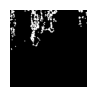

Y 레이블 : 6.0


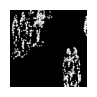

Y 레이블 : 7.5


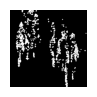

Y 레이블 : 2.5


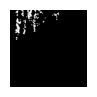

Y 레이블 : 2.0


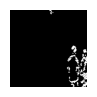

In [6]:
# 이미지 데이터 시각화 (5개).
for i_image in [ random.randint(0,X_train.shape[0]-1) for _ in range(5)]:
    print("Y 레이블 :", Y_train[i_image])
    plt.figure(figsize=(1,1))
    plt.imshow(X_train[i_image,:,:], cmap='gray')
    plt.axis("off")
    plt.show()

In [7]:
drop_prob = 0.5
my_model = Sequential()
# 1st convolution + pooling.
my_model.add(Conv2D(input_shape=(200,200,1),filters=32,kernel_size=(5,5),padding='same',activation="relu", name="Conv-1"))        # 1 channel of grayscale.
my_model.add(MaxPooling2D(pool_size=2, name="Pooling-1"))
# 2nd convolution + pooling.
my_model.add(Conv2D(filters=64,kernel_size=(5,5), padding='same',activation="relu",name="Conv-2"))
my_model.add(MaxPooling2D(pool_size=2, name="Pooling-2"))
# 3rd convolution + pooling.
my_model.add(Conv2D(filters=96,kernel_size=(5,5), padding='same',activation="relu",name="Conv-3"))
my_model.add(MaxPooling2D(pool_size=2, name="Pooling-3"))
# 4rd convolution + pooling.
my_model.add(Conv2D(filters=128,kernel_size=(5,5), padding='same',activation="relu",name="Conv-4"))
my_model.add(MaxPooling2D(pool_size=2, name="Pooling-4"))
# Flattened fully connected layer.
my_model.add(Flatten(name="Flatten"))
my_model.add(Dense(units = 1024, activation="relu", name="Dense-1"))
# Apply dropout.
my_model.add(Dropout(rate=drop_prob, name="Dropout"))
# Output layer.
my_model.add(Dense(units = 1, activation="linear", name="Dense-2"))


In [8]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv-1 (Conv2D)             (None, 200, 200, 32)      832       
                                                                 
 Pooling-1 (MaxPooling2D)    (None, 100, 100, 32)      0         
                                                                 
 Conv-2 (Conv2D)             (None, 100, 100, 64)      51264     
                                                                 
 Pooling-2 (MaxPooling2D)    (None, 50, 50, 64)        0         
                                                                 
 Conv-3 (Conv2D)             (None, 50, 50, 96)        153696    
                                                                 
 Pooling-3 (MaxPooling2D)    (None, 25, 25, 96)        0         
                                                                 
 Conv-4 (Conv2D)             (None, 25, 25, 128)       3

In [9]:
# Hyperparameters.
n_epochs = 100
batch_size = 30
learn_rate = 0.00011

In [10]:
# Optimizer 객체 생성 후 컴파일한다.
my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "mean_squared_error", optimizer = my_optimizer, metrics=["mse"])

In [11]:
# 학습.
# verbose = 0 : 출력 없음. verbose = 1 : 출력 함.
my_EarlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)          # 조기 종료 허락!
my_summary = my_model.fit(X_train, Y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 1,callbacks=[my_EarlyStop])

Epoch 1/100
20/20 [==============================] - 140s 7s/step - loss: 4552.3594 - mse: 4552.3594 - val_loss: 29.4778 - val_mse: 29.4778
Epoch 2/100
20/20 [==============================] - 134s 7s/step - loss: 16.5282 - mse: 16.5282 - val_loss: 3.7107 - val_mse: 3.7107
Epoch 3/100
20/20 [==============================] - 144s 7s/step - loss: 6.9914 - mse: 6.9914 - val_loss: 3.6699 - val_mse: 3.6699
Epoch 4/100
20/20 [==============================] - 145s 7s/step - loss: 5.4028 - mse: 5.4028 - val_loss: 2.3815 - val_mse: 2.3815
Epoch 5/100
20/20 [==============================] - 139s 7s/step - loss: 4.4302 - mse: 4.4302 - val_loss: 2.1801 - val_mse: 2.1801
Epoch 6/100
20/20 [==============================] - 137s 7s/step - loss: 3.8657 - mse: 3.8657 - val_loss: 2.0118 - val_mse: 2.0118
Epoch 7/100
20/20 [==============================] - 135s 7s/step - loss: 3.1677 - mse: 3.1677 - val_loss: 1.7490 - val_mse: 1.7490
Epoch 8/100
20/20 [==============================] - 162s 8s/step 

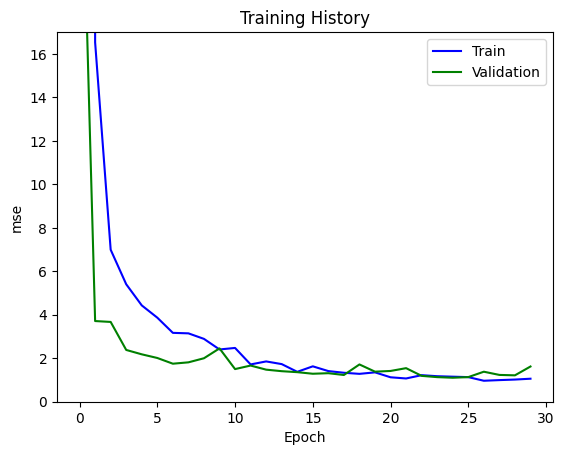

In [15]:
 # 학습 history 출력.
n_skip = 0                 # Skip the first few steps.
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('mse')
plt.ylim(0,17)
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 78ms/step
정답 : 12.25
예측 : 10.953724
혼잡


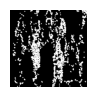

1/1 [==============================] - 0s 91ms/step
정답 : 8.5
예측 : 6.2610745
원활


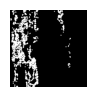

1/1 [==============================] - 0s 84ms/step
정답 : 3.5
예측 : 3.4580646
원활


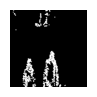

1/1 [==============================] - 0s 101ms/step
정답 : 6.5
예측 : 5.9920535
원활


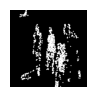

1/1 [==============================] - 0s 85ms/step
정답 : 13.5
예측 : 11.349854
혼잡


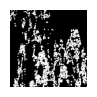

In [24]:
# 랜덤으로 테스트 이미지를 추출해서 예측해 본다.
for i_image in [ random.randint(0,X_test.shape[0]-1) for _ in range(5)]:
    predict = my_model.predict(X_test[i_image].reshape(1,200,200,1))[0][0]
    print("정답 :" , Y_test[i_image])
    print("예측 :" , predict)
    if int(predict) > 15:                   # 혼잡도 출력
      print('\033[31m' + '위험' + '\033[0m')
    elif (int(predict) <= 15 and int(predict) >= 9):
      print('\033[33m' + '혼잡' + '\033[0m')
    else:
      print('\033[32m' + '원활' + '\033[0m')
    plt.figure(figsize=(1,1))
    plt.imshow(X_test[i_image,:,:],cmap="gray")
    plt.axis("off")
    plt.show()

In [14]:
ACC = my_model.evaluate(X_test, Y_test, verbose=0)[1]
print("Test mse : {}".format(np.round(ACC,3)))

Test mse : 1.323
